In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
restaurant_df = pd.read_csv('data/full_restaurant_rating_data.csv')
restaurant_df.head()

,name,address,region,latitude,longitude,nearby_attraction,distance_from_attraction,price_category,price_range,mon_operating_hours,...,num_of_rating_2,num_of_rating_3,num_of_rating_4,num_of_rating_5,food_rating,service_rating,value_rating,atmosphere_rating,overall_rating,url
0,Alt Pizza,"60 Robertson Quay The Quayside 01-05, Singapor...",Robertson Quay,1.290260,103.83919,Chinatown,1.0,mid range,[],11:00 AM - 10:00 PM,...,1,3,4,5,4.5,4.5,4.5,4.5,4.0,https://www.tripadvisor.com.sg/Restaurant_Revi...
1,Entre-Nous creperie,"27 Seah Street # 01-01, Singapore 188383 Singa...",Central Area/City Area,1.296215,103.85462,City Hall Building,0.4,mid range,S$13 - S$27,NaN,...,9,27,161,1056,5.0,5.0,5.0,5.0,5.0,https://www.tripadvisor.com.sg/Restaurant_Revi...
2,The Courtyard,1 Fullerton Square Fullerton Hotel The Fullert...,Central Area/City Area,1.286365,103.85306,Merlion Park,0.2,fine dining,S$40 - S$67,09:00 AM - 6:00 PM,...,20,51,179,1049,4.0,4.0,4.0,4.0,4.5,https://www.tripadvisor.com.sg/Restaurant_Revi...
3,Portman's Bar,6 Raffles Boulevard Marina Square Level 4 At P...,Marina Centre,1.291641,103.85701,Merlion Park,0.6,fine dining,S$10 - S$200,10:30 AM - 10:30 PM,...,0,1,14,232,4.5,4.5,4.5,4.5,5.0,https://www.tripadvisor.com.sg/Restaurant_Revi...
4,Grand Shanghai Restaurant,"390 Havelock Road King's Centre, Singapore 169...",Robertson Quay,1.289593,103.83567,Chinatown,1.2,mid range,[],11:30 AM - 2:30 PM,...,3,12,74,529,4.0,4.0,4.0,4.0,5.0,https://www.tripadvisor.com.sg/Restaurant_Revi...


### Computing % of restaurants labelled as travellors choice

In [5]:
travellors_choice_data = [[ round(restaurant_df[restaurant_df['is_travellors_choice'] == True].shape[0] / restaurant_df.shape[0] * 100,2),
round(restaurant_df[restaurant_df['is_travellors_choice'] == False].shape[0] / restaurant_df.shape[0] * 100,2)
]]

travellors_choice_df = pd.DataFrame(travellors_choice_data, columns=['is_travellors_choice = True','is_travellors_choice = False'])
travellors_choice_df


,is_travellors_choice = True,is_travellors_choice = False
0,3.28,96.72


### Compute % of restaurants given michellin star

In [6]:
michellin_data = [[ round(restaurant_df[restaurant_df['is_michellin'] == True].shape[0] / restaurant_df.shape[0] * 100,2),
round(restaurant_df[restaurant_df['is_michellin'] == False].shape[0] / restaurant_df.shape[0] * 100,2)
]]

michellin_df = pd.DataFrame(michellin_data, columns=['is_michellin = True','is_michellin = False'])
michellin_df

,is_michellin = True,is_michellin = False
0,1.75,98.25


### Compute correlation between is_travellors_choice, is_michellin with overall_rating

In [95]:
restaurant_df_copy = restaurant_df.copy()
restaurant_df_copy['is_travellors_choice'] = restaurant_df_copy['is_travellors_choice'].astype(int)
restaurant_df_copy['is_michellin'] = restaurant_df_copy['is_michellin'].astype(int)

restaurant_df_copy = restaurant_df_copy[['is_travellors_choice','is_michellin','overall_rating']]
restaurant_df_copy.corr(method='pearson')

,is_travellors_choice,is_michellin,overall_rating
is_travellors_choice,1.000000,0.148237,0.111390
is_michellin,0.148237,1.000000,0.066304
overall_rating,0.111390,0.066304,1.000000


### Number of Reviews (Histogram)

0           1492
1-20        6600
21-100      2062
101-200      497
201-300      177
301-400      109
401-500       67
501-600       50
601-700       39
701-800       14
801-900       14
901-1000       9
>1000         31
Name: reviews_bins, dtype: int64


<AxesSubplot:>

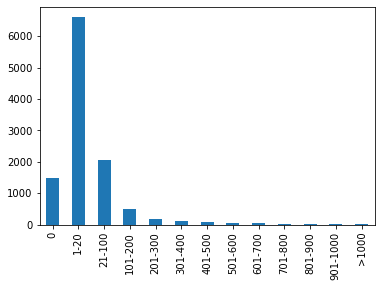

In [94]:
num_of_reviews_df2 = restaurant_df.copy()

num_of_reviews_df2.describe()['num_of_reviews'].loc[['min', 'max']]

# (-1, 0] = value of -1 is not included in this bin but a value of 0 is included
# this is to see how many 0 reviews are there in the dataset
reviews_bins = [-1, 0, 20, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000]
reviews_bins_labels = ['0', '1-20', '21-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '>1000']

num_of_reviews_df2['reviews_bins'] = pd.cut(num_of_reviews_df2['num_of_reviews'], reviews_bins, labels = reviews_bins_labels)

# distribution of number_of_review in bins
print(num_of_reviews_df2['reviews_bins'].value_counts().sort_index())

# histogram of reviews
num_of_reviews_df2['reviews_bins'].value_counts().sort_index().plot.bar()


In [96]:
# Ignore this chunk of code

# num_of_reviews_df2 = restaurant_df.copy()

# conditions = [
#     (num_of_reviews_df2['num_of_reviews'] == 0),
#     (num_of_reviews_df2['num_of_reviews'] < 10),
#     (num_of_reviews_df2['num_of_reviews'] >= 10) & (num_of_reviews_df2['num_of_reviews'] < 20),
#     (num_of_reviews_df2['num_of_reviews'] >= 20) & (num_of_reviews_df2['num_of_reviews'] < 500),
#     (num_of_reviews_df2['num_of_reviews'] >= 500) & (num_of_reviews_df2['num_of_reviews'] < 1000),
#     (num_of_reviews_df2['num_of_reviews'] >= 1000)
# ]

# values = ['0 reviews', '<10 reviews', '10-19 reviews', '20-499 reviews', '500-999 reviews', '>1000 reviews']

# num_of_reviews_df2['reviews_bin'] = np.select(conditions, values)

# plt.style.use('ggplot')
# plt.figure(figsize=(13,8))
# plt.hist(num_of_reviews_df2['reviews_bin'])
# plt.show()

# print(num_of_reviews_df2['reviews_bin'] )

### Number of Ratings (Boxplot)

Text(0, 0.5, 'number of reviews')

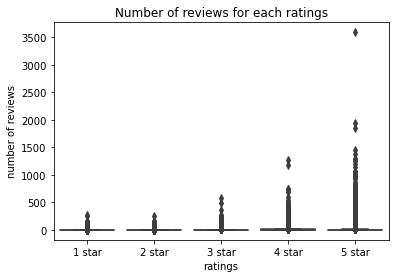

In [130]:
num_of_ratings_df = restaurant_df.copy()

num_of_ratings_df = num_of_ratings_df[['num_of_rating_1','num_of_rating_2','num_of_rating_3','num_of_rating_4','num_of_rating_5']]

# renaming the columns for easier identification
num_of_ratings_df.rename(columns = {'num_of_rating_1':'1 star', 'num_of_rating_2':'2 star', 'num_of_rating_3':'3 star', 'num_of_rating_4':'4 star', 'num_of_rating_5':'5 star'}, inplace = True)

num_of_ratings_melted = pd.melt(num_of_ratings_df)

#print(num_of_ratings_melted)

#create seaborn plot
sns.boxplot(x='variable', y='value', data=num_of_ratings_melted).set(title = 'Number of reviews for each ratings')
plt.xlabel('ratings')
plt.ylabel('number of reviews')

### Average Rating (calculated from num_of_rating)

In [116]:
average_rating_df = restaurant_df.copy()

average_rating_df['total_ratings'] = average_rating_df['num_of_rating_1'] + average_rating_df['num_of_rating_2'] + average_rating_df['num_of_rating_3'] + average_rating_df['num_of_rating_4'] + average_rating_df['num_of_rating_5']

average_rating_df['total_stars'] = (average_rating_df['num_of_rating_1'] * 1) + (average_rating_df['num_of_rating_2'] * 2) + (average_rating_df['num_of_rating_3'] * 3) + (average_rating_df['num_of_rating_4'] * 4) + (average_rating_df['num_of_rating_5'] * 5)   

average_rating_df['average_rating'] = round(average_rating_df['total_stars'] / average_rating_df['total_ratings'], 2)


<AxesSubplot:>

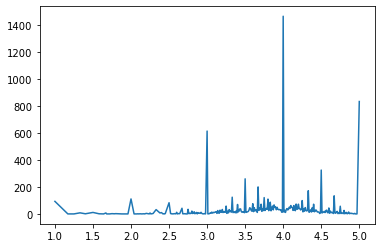

In [105]:
# visualizing distribution of average rating 
average_rating_df['average_rating'].value_counts().sort_index().plot()

In [117]:
# Average rating in percentile order 
for i in np.arange(0.1, 1.1, 0.1):
    print(f'Average Rating at {round(int(i*100), 2)} percentile: ' + str(round(average_rating_df['average_rating'].quantile(i), 2)))

Average Rating at 10 percentile: 3.0
Average Rating at 20 percentile: 3.33
Average Rating at 30 percentile: 3.62
Average Rating at 40 percentile: 3.82
Average Rating at 50 percentile: 4.0
Average Rating at 60 percentile: 4.0
Average Rating at 70 percentile: 4.18
Average Rating at 80 percentile: 4.41
Average Rating at 90 percentile: 4.75
Average Rating at 100 percentile: 5.0


### Food rating, Service rating, Value rating, Atmosphere rating

<AxesSubplot:xlabel='variable', ylabel='value'>

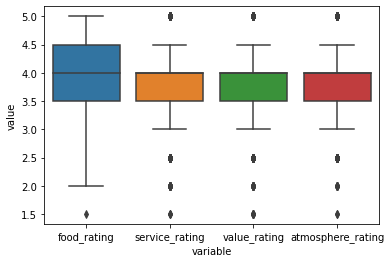

In [119]:
various_ratings_df = restaurant_df.copy()

various_ratings_df = various_ratings_df[['food_rating','service_rating','value_rating','atmosphere_rating']]

various_ratings_melted = pd.melt(various_ratings_df)

# create seaborn plot
sns.boxplot(x='variable', y='value', data=various_ratings_melted)


### Overall Rating

<AxesSubplot:>

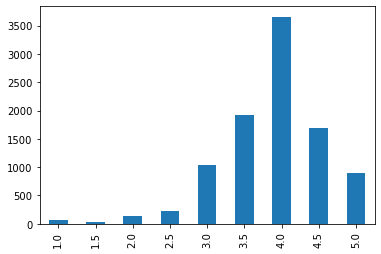

In [123]:
overall_rating_df = restaurant_df.copy()

# plotting only overall_ratings that are not -1
overall_rating_df[overall_rating_df['overall_rating'] != -1]['overall_rating'].value_counts().sort_index().plot.bar()


In [124]:
# Overall rating in percentile order 
for i in np.arange(0.1, 1.1, 0.1):
    print(f'Overall Rating at {round(int(i*100), 2)} percentile: ' + str(round(overall_rating_df[overall_rating_df['overall_rating'] != -1]['overall_rating'].quantile(i), 2)))


Overall Rating at 10 percentile: 3.0
Overall Rating at 20 percentile: 3.5
Overall Rating at 30 percentile: 3.5
Overall Rating at 40 percentile: 4.0
Overall Rating at 50 percentile: 4.0
Overall Rating at 60 percentile: 4.0
Overall Rating at 70 percentile: 4.0
Overall Rating at 80 percentile: 4.5
Overall Rating at 90 percentile: 4.5
Overall Rating at 100 percentile: 5.0
